Epoch 1/100
11/11 [==============================] - 9s 387ms/step - loss: 0.1549 - val_loss: 0.0452
Epoch 2/100
11/11 [==============================] - 2s 164ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 3/100
11/11 [==============================] - 2s 143ms/step - loss: 0.0096 - val_loss: 0.0112
Epoch 4/100
11/11 [==============================] - 2s 157ms/step - loss: 0.0059 - val_loss: 0.0162
Epoch 5/100
11/11 [==============================] - 2s 145ms/step - loss: 0.0043 - val_loss: 0.0097
Epoch 6/100
11/11 [==============================] - 2s 157ms/step - loss: 0.0038 - val_loss: 0.0094
Epoch 7/100
11/11 [==============================] - 2s 148ms/step - loss: 0.0036 - val_loss: 0.0113
Epoch 8/100
11/11 [==============================] - 2s 147ms/step - loss: 0.0035 - val_loss: 0.0107
Epoch 9/100
11/11 [==============================] - 2s 148ms/step - loss: 0.0034 - val_loss: 0.0102
Epoch 10/100
11/11 [==============================] - 2s 147ms/step - loss: 0.0036 - val_lo

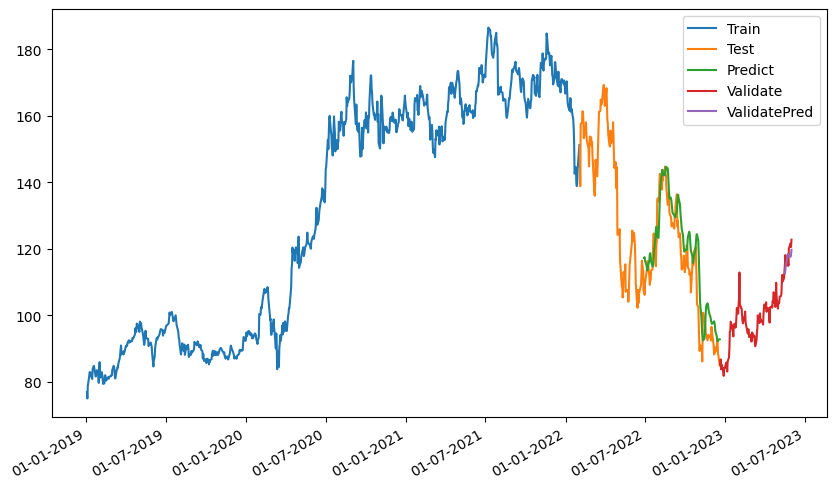

In [1]:

#AMZN 7:2:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)



# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
9/9 [==============================] - 7s 290ms/step - loss: 0.0808 - val_loss: 0.0186
Epoch 2/100
9/9 [==============================] - 1s 155ms/step - loss: 0.0165 - val_loss: 0.0204
Epoch 3/100
9/9 [==============================] - 1s 164ms/step - loss: 0.0086 - val_loss: 0.0171
Epoch 4/100
9/9 [==============================] - 1s 150ms/step - loss: 0.0054 - val_loss: 0.0201
Epoch 5/100
9/9 [==============================] - 1s 146ms/step - loss: 0.0042 - val_loss: 0.0157
Epoch 6/100
9/9 [==============================] - 1s 143ms/step - loss: 0.0040 - val_loss: 0.0201
Epoch 7/100
9/9 [==============================] - 1s 143ms/step - loss: 0.0038 - val_loss: 0.0162
Epoch 8/100
9/9 [==============================] - 1s 143ms/step - loss: 0.0037 - val_loss: 0.0186
Epoch 9/100
9/9 [==============================] - 1s 142ms/step - loss: 0.0036 - val_loss: 0.0173
Epoch 10/100
9/9 [==============================] - 1s 151ms/step - loss: 0.0036 - val_loss: 0.0159
Epoch 11/

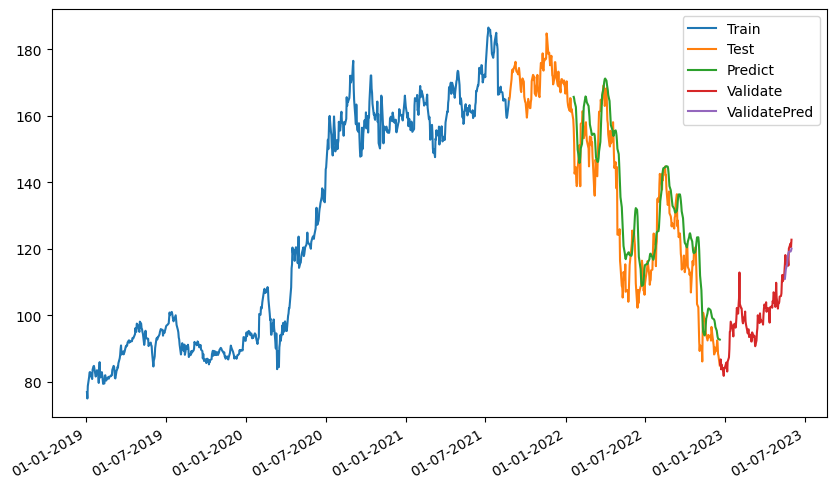

In [2]:

#AMZN 6:3:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
11/11 [==============================] - 8s 270ms/step - loss: 0.1233 - val_loss: 0.0260
Epoch 2/100
11/11 [==============================] - 2s 170ms/step - loss: 0.0193 - val_loss: 0.0243
Epoch 3/100
11/11 [==============================] - 2s 166ms/step - loss: 0.0100 - val_loss: 0.0103
Epoch 4/100
11/11 [==============================] - 2s 178ms/step - loss: 0.0061 - val_loss: 0.0163
Epoch 5/100
11/11 [==============================] - 2s 166ms/step - loss: 0.0040 - val_loss: 0.0095
Epoch 6/100
11/11 [==============================] - 2s 161ms/step - loss: 0.0038 - val_loss: 0.0097
Epoch 7/100
11/11 [==============================] - 2s 165ms/step - loss: 0.0036 - val_loss: 0.0110
Epoch 8/100
11/11 [==============================] - 2s 164ms/step - loss: 0.0036 - val_loss: 0.0103
Epoch 9/100
11/11 [==============================] - 2s 163ms/step - loss: 0.0035 - val_loss: 0.0103
Epoch 10/100
11/11 [==============================] - 2s 163ms/step - loss: 0.0035 - val_lo

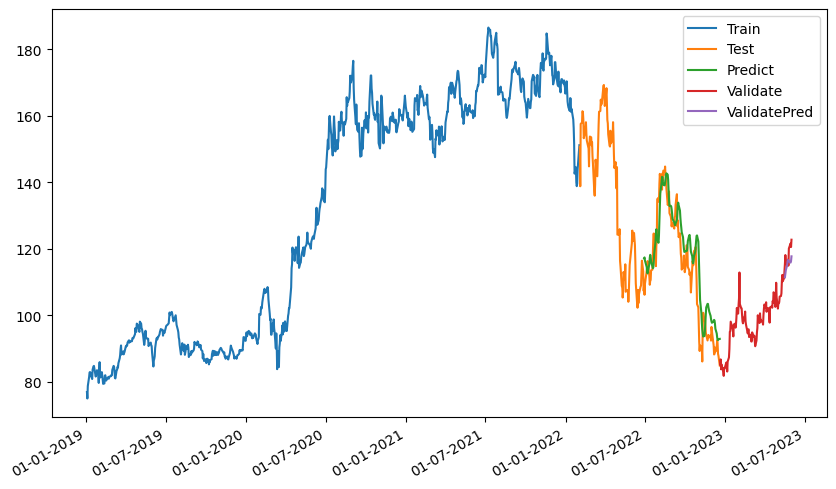

In [3]:

#AMZN 6:2:2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
11/11 [==============================] - 7s 239ms/step - loss: 0.1106 - val_loss: 0.0228
Epoch 2/100
11/11 [==============================] - 1s 131ms/step - loss: 0.0166 - val_loss: 0.0263
Epoch 3/100
11/11 [==============================] - 2s 145ms/step - loss: 0.0094 - val_loss: 0.0137
Epoch 4/100
11/11 [==============================] - 1s 131ms/step - loss: 0.0070 - val_loss: 0.0153
Epoch 5/100
11/11 [==============================] - 1s 124ms/step - loss: 0.0047 - val_loss: 0.0065
Epoch 6/100
11/11 [==============================] - 1s 125ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 7/100
11/11 [==============================] - 1s 128ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 8/100
11/11 [==============================] - 5s 493ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 9/100
11/11 [==============================] - 3s 293ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 10/100
11/11 [==============================] - 2s 203ms/step - loss: 0.0029 - val_lo

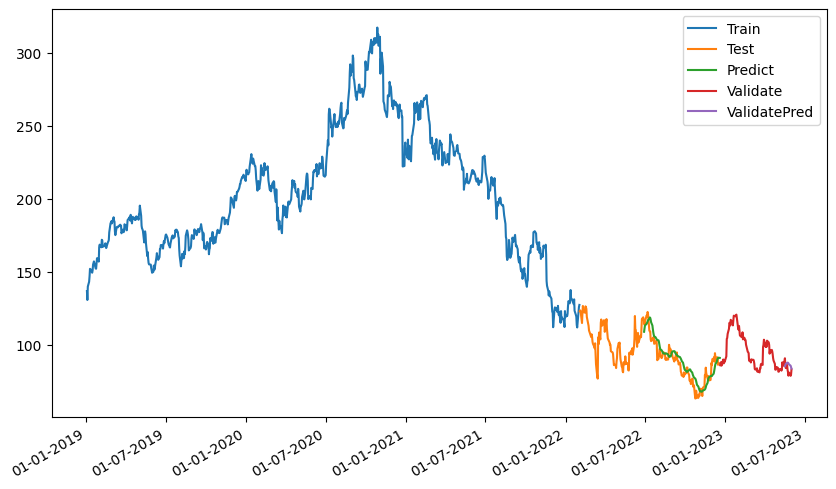

In [4]:

#BABA 7:2:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BABA.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('BABA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
9/9 [==============================] - 11s 530ms/step - loss: 0.1331 - val_loss: 0.0236
Epoch 2/100
9/9 [==============================] - 3s 357ms/step - loss: 0.0164 - val_loss: 0.0086
Epoch 3/100
9/9 [==============================] - 3s 335ms/step - loss: 0.0090 - val_loss: 0.0211
Epoch 4/100
9/9 [==============================] - 3s 335ms/step - loss: 0.0060 - val_loss: 0.0109
Epoch 5/100
9/9 [==============================] - 3s 335ms/step - loss: 0.0052 - val_loss: 0.0157
Epoch 6/100
9/9 [==============================] - 3s 339ms/step - loss: 0.0042 - val_loss: 0.0092
Epoch 7/100
9/9 [==============================] - 3s 334ms/step - loss: 0.0040 - val_loss: 0.0094
Epoch 8/100
9/9 [==============================] - 3s 376ms/step - loss: 0.0035 - val_loss: 0.0065
Epoch 9/100
9/9 [==============================] - 4s 444ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 10/100
9/9 [==============================] - 4s 456ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 11

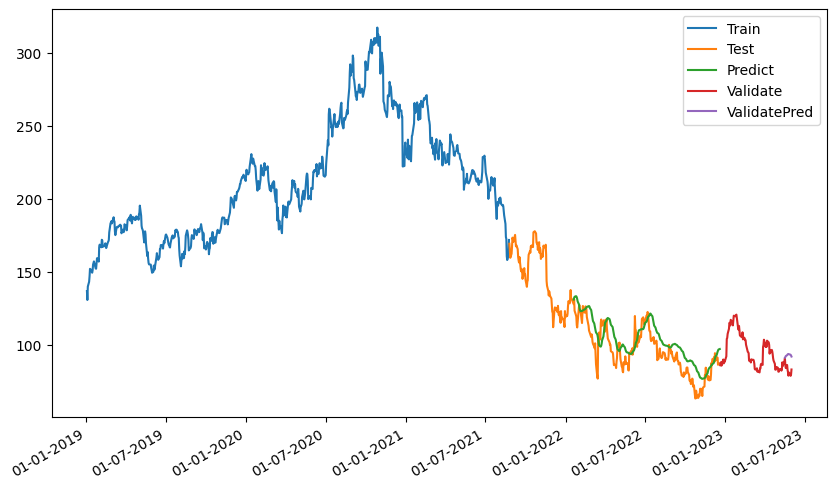

In [5]:

#BABA 6:3:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BABA.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)
# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('BABA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
9/9 [==============================] - 10s 511ms/step - loss: 0.1238 - val_loss: 0.0145
Epoch 2/100
9/9 [==============================] - 3s 383ms/step - loss: 0.0175 - val_loss: 0.0138
Epoch 3/100
9/9 [==============================] - 4s 404ms/step - loss: 0.0085 - val_loss: 0.0178
Epoch 4/100
9/9 [==============================] - 4s 400ms/step - loss: 0.0067 - val_loss: 0.0140
Epoch 5/100
9/9 [==============================] - 4s 400ms/step - loss: 0.0052 - val_loss: 0.0140
Epoch 6/100
9/9 [==============================] - 4s 402ms/step - loss: 0.0044 - val_loss: 0.0109
Epoch 7/100
9/9 [==============================] - 4s 398ms/step - loss: 0.0040 - val_loss: 0.0090
Epoch 8/100
9/9 [==============================] - 4s 400ms/step - loss: 0.0036 - val_loss: 0.0075
Epoch 9/100
9/9 [==============================] - 4s 402ms/step - loss: 0.0033 - val_loss: 0.0056
Epoch 10/100
9/9 [==============================] - 4s 400ms/step - loss: 0.0032 - val_loss: 0.0049
Epoch 11

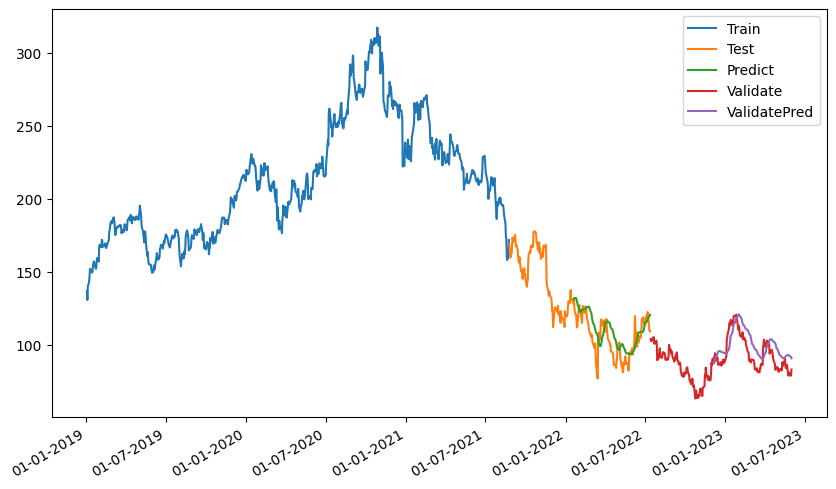

In [6]:

#BABA 6:2:2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BABA.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('BABA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
11/11 [==============================] - 9s 334ms/step - loss: 0.1264 - val_loss: 0.0254
Epoch 2/100
11/11 [==============================] - 2s 194ms/step - loss: 0.0157 - val_loss: 0.0040
Epoch 3/100
11/11 [==============================] - 2s 191ms/step - loss: 0.0077 - val_loss: 0.0037
Epoch 4/100
11/11 [==============================] - 2s 192ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 5/100
11/11 [==============================] - 2s 184ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 6/100
11/11 [==============================] - 2s 186ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 7/100
11/11 [==============================] - 2s 190ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 8/100
11/11 [==============================] - 2s 190ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 9/100
11/11 [==============================] - 2s 184ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/100
11/11 [==============================] - 2s 188ms/step - loss: 0.0028 - val_lo

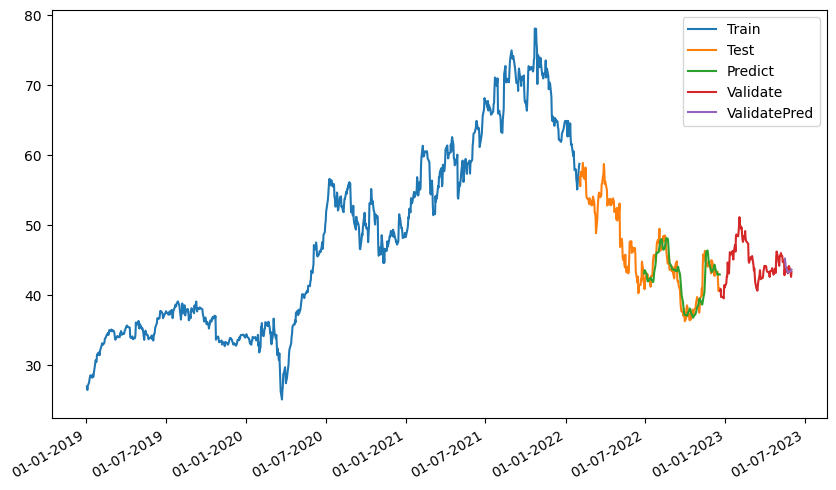

In [7]:

#EBAY 7:2:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('EBAY.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('EBAY.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
9/9 [==============================] - 8s 348ms/step - loss: 0.0669 - val_loss: 0.0249
Epoch 2/100
9/9 [==============================] - 2s 224ms/step - loss: 0.0136 - val_loss: 0.0030
Epoch 3/100
9/9 [==============================] - 2s 211ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 4/100
9/9 [==============================] - 2s 214ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 5/100
9/9 [==============================] - 2s 209ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 6/100
9/9 [==============================] - 2s 210ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 7/100
9/9 [==============================] - 2s 210ms/step - loss: 0.0028 - val_loss: 0.0045
Epoch 8/100
9/9 [==============================] - 2s 212ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 9/100
9/9 [==============================] - 2s 217ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 10/100
9/9 [==============================] - 2s 214ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 11/

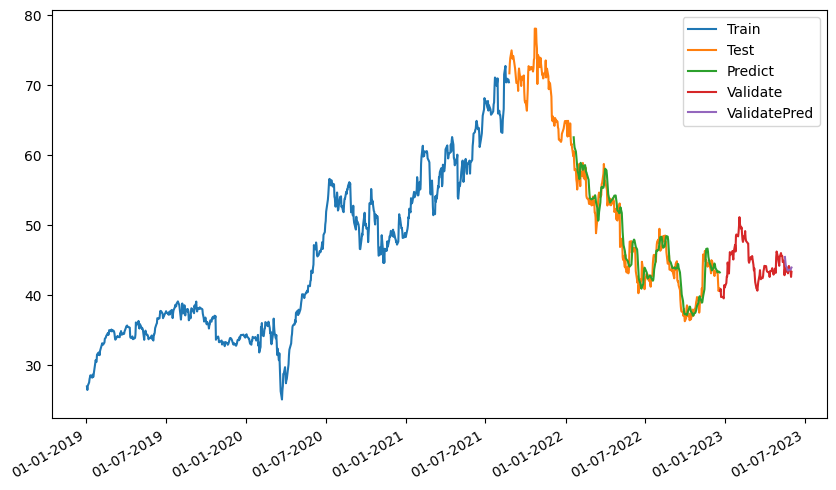

In [8]:

#EBAY 6:3:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('EBAY.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('EBAY.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Epoch 1/100
9/9 [==============================] - 7s 326ms/step - loss: 0.0648 - val_loss: 0.0186
Epoch 2/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0129 - val_loss: 0.0028
Epoch 3/100
9/9 [==============================] - 2s 189ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 4/100
9/9 [==============================] - 2s 186ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 5/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 6/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0033 - val_loss: 0.0104
Epoch 7/100
9/9 [==============================] - 2s 182ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 8/100
9/9 [==============================] - 2s 186ms/step - loss: 0.0029 - val_loss: 0.0075
Epoch 9/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0029 - val_loss: 0.0057
Epoch 10/100
9/9 [==============================] - 2s 186ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 11/

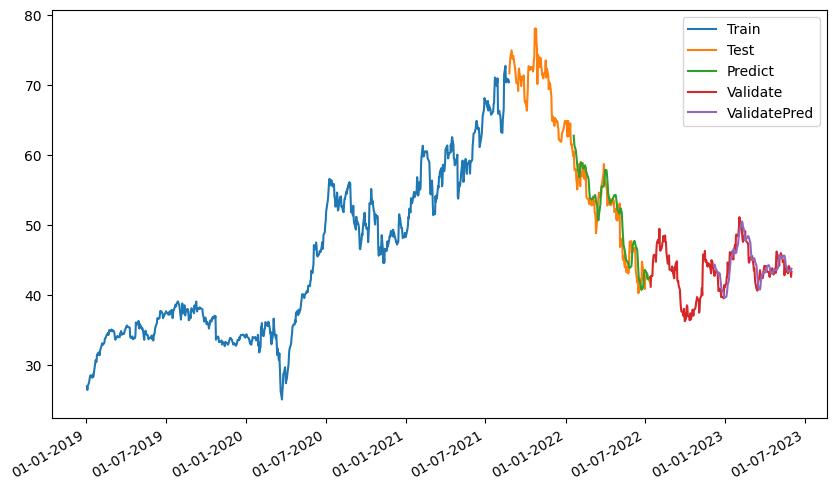

In [9]:

#EBAY 6:2:2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('EBAY.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler  = MinMaxScaler(feature_range =(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2* len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

# 5. Hàm Create Dataset

import numpy 
# convert an array of values in a dataset matrix
def create_dataset(dataset, time_step =1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X = t, t+1, t+2... t+99 and Y = t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

# 8. Define LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train, validation_data = (X_test,ytest),epochs = 100, batch_size = 64, verbose =1)

#10. Dự đoán trên dữ liệu test, val

train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(y_pred)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 12. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - yval)**2)
test_mse = np.mean((y_pred - ytest)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('EBAY.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()